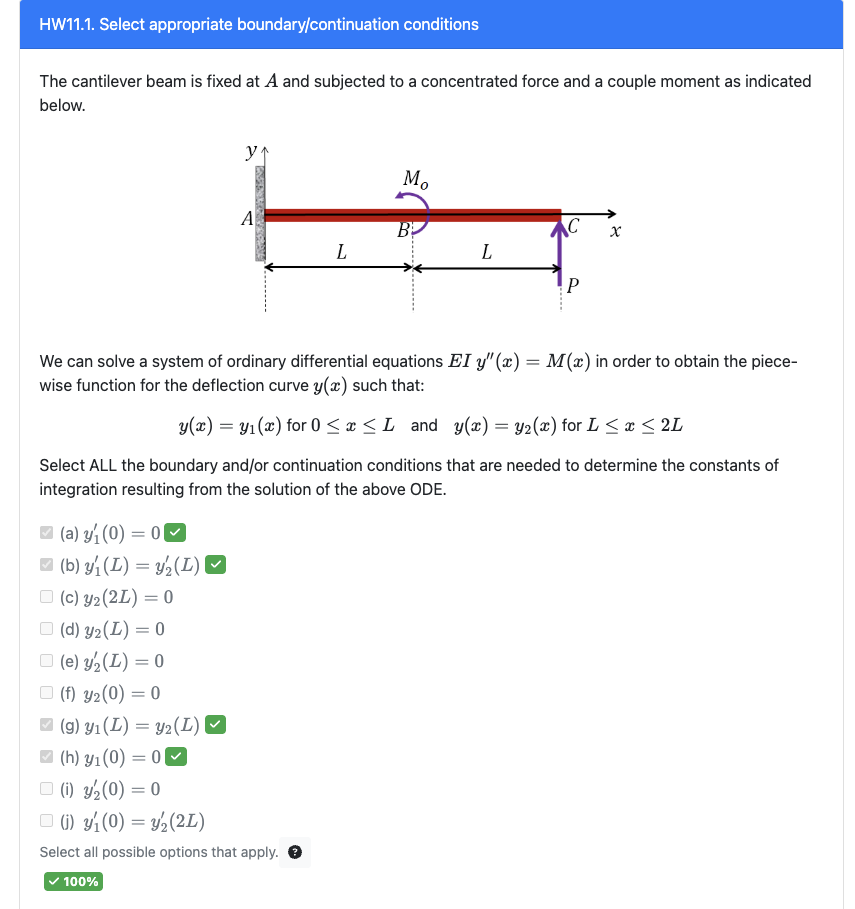

In [ ]:
# 1


In [ ]:
# 2


In [ ]:
# 3

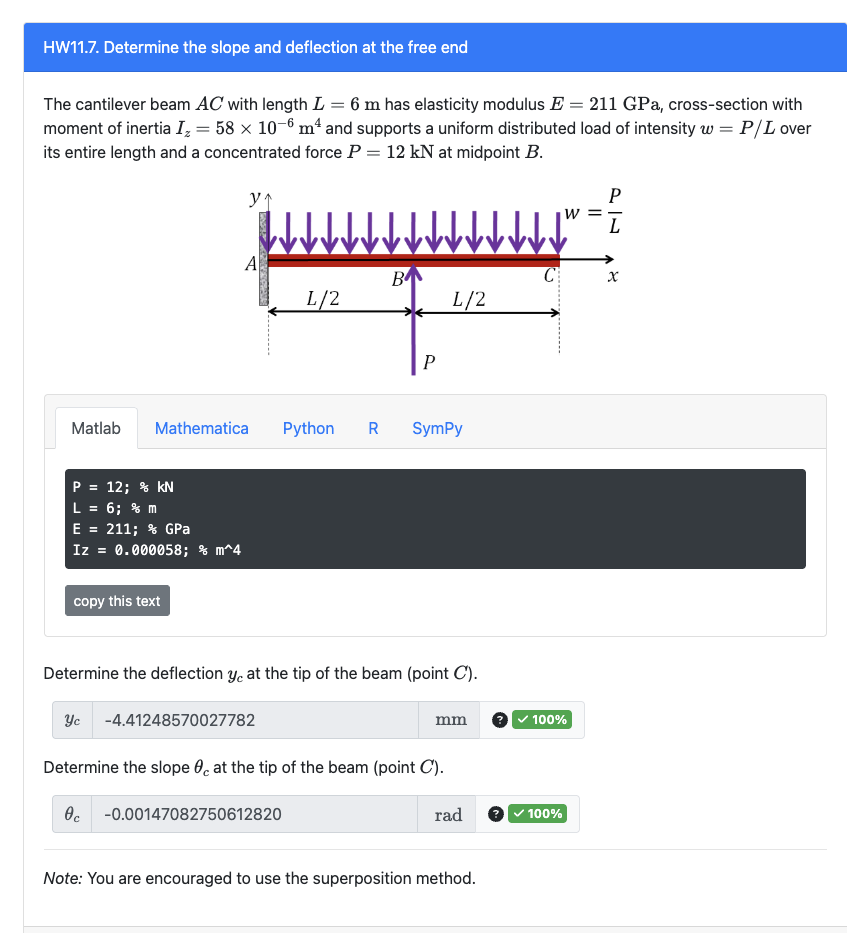

In [ ]:
from sympy import *

P = 12 # kN
L = 6 # m
E = 211 # GPa
Iz = 0.000058 # m^4
########################复制部分
mm=1e-3
P*=1000
E*=1e9
########################单位转化

x=S('x')

def yw(w,L,E,I):
    x=S('x')
    return -w/(24*E*I)*(x**4-4*L*x**3+6*L**2*x**2)

def yf(f,L,E,I):
    x=S('x')
    return f/(6*E*I)*(x**3-3*L*x**2)

def ym(M,L,E,I):
    return -M/(2*E*I)*x**2

def yf_2pin(f,L,E,I): #L是两端点之间的距离
    return f/(48*E*I)*(4*x**3-3*L**2*x)

def yw_2pin(w,L,E,I): #L是两端点之间的距离
    return -w/(24*E*I)*(x**4-2*L*x**3+L**3*x)






#对于0→L/2
w=P/L
y_part1_1=-w/(24*E*Iz)*(x**4-4*L*x**3+6*L**2*x**2)
y_part2_1=-P/(6*E*Iz)*(x**3-3*(L/2)*x**2)                 #注意这里P是朝上的，所以要加负号，以及L/2❗❗❗❗❗❗❗❗❗
y1=y_part2_1


#限制条件
h=diff(y1,x,0).subs(x,0.5*L)
k=diff(y1,x,1).subs(x,0.5*L)

#对于L/2→L
y_part1_2=-w/(24*E*Iz)*(x**4-4*L*x**3+6*L**2*x**2)
y_part2_2=h+k*(x-L/2)
y2=y_part1_2+y_part2_2

yc=y2.subs(x,L)/mm 
thetac=atan(diff(y2,x,1).subs(x,L))

yc,thetac

(-4.41248570027782, -0.00147082750612820)

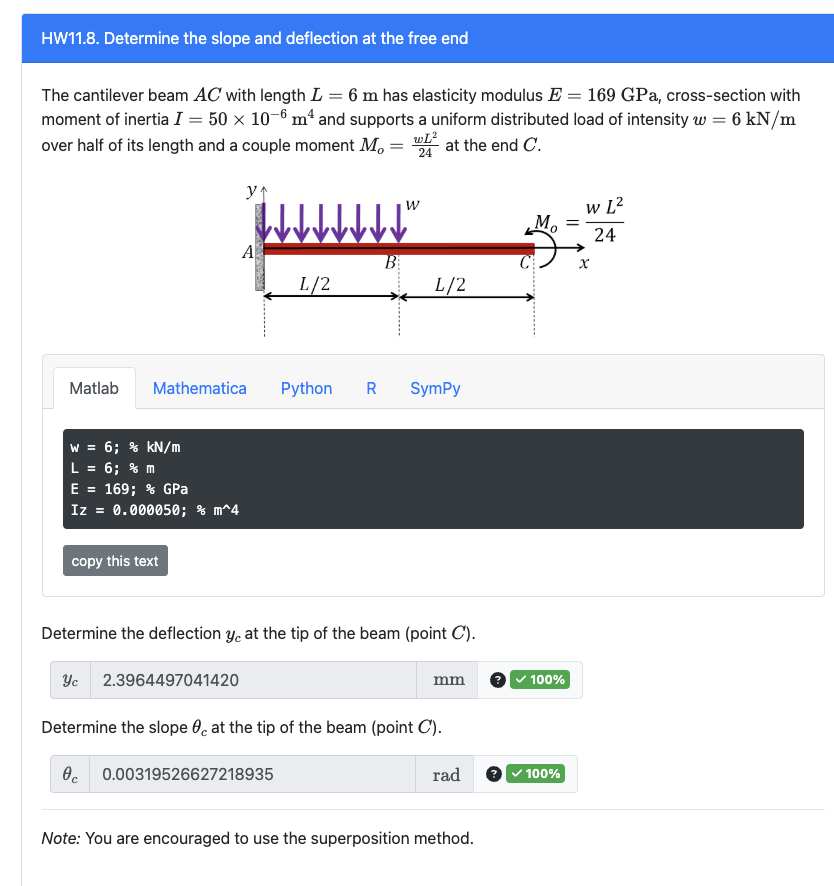

In [2]:
# 8
from sympy import *

w = 6 # kN/m
L = 6 # m
E = 169 # GPa
Iz = 0.000050 # m^4
####################复制部分

mm=0.001
w*=1000;E*=1e9;I=Iz;M=w*L**2/24


x=S('x')

def yw(w,L,E,I):
    x=S('x')
    return -w/(24*E*I)*(x**4-4*L*x**3+6*L**2*x**2)

def yf(f,L,E,I):
    x=S('x')
    return f/(6*E*I)*(x**3-3*L*x**2)

def ym(M,L,E,I):
    return -M/(2*E*I)*x**2

def yf_2pin(f,L,E,I): #L是两端点之间的距离
    return f/(48*E*I)*(4*x**3-3*L**2*x)

def yw_2pin(w,L,E,I): #L是两端点之间的距离
    return -w/(24*E*I)*(x**4-2*L*x**3+L**3*x)


w1=w
L1=0.5*L

y11=yw(w1,L1,E,I)

h=diff(y11,x,0).subs(x,L1)
k=diff(y11,x,1).subs(x,L1)
y12=h+k*(x-L1)
y1=y12


#M产生的
M2=-M
L2=L
y2=ym(M2,L2,E,I)

y=y1+y2

delta=diff(y,x,0).subs(x,L)
theta=diff(y,x,1).subs(x,L)

delta/mm,theta



(2.39644970414201, 0.00319526627218935)